# 感官描述的文本挖掘

对感官描述文本进行挖掘。提出以下几个有趣的问题。


1. 产品共性分析

2. 地缘差异分析

3. 颜色图谱

In [1]:
import os
import json
from src import *

# 绘图输出目录
figures_save_dir = "figures"
os.makedirs(figures_save_dir, exist_ok=True)

# 读取产品数据
products_file_path = "../data/tokenized_products.json"
products = json.load(open(products_file_path, 'r', encoding='utf-8'))


## 产品共性分析

对于同一类产品，全国范围下的产品形容词有哪些？这些形容词具有哪些共性？例如茶、肉、米等不同产品的形容词有哪些共性？

这里以排名数量前十的产品为例，进行分析。

```
茶、大米、苹果、西瓜、葡萄
猪、核桃、小米、 酒、 花生
```

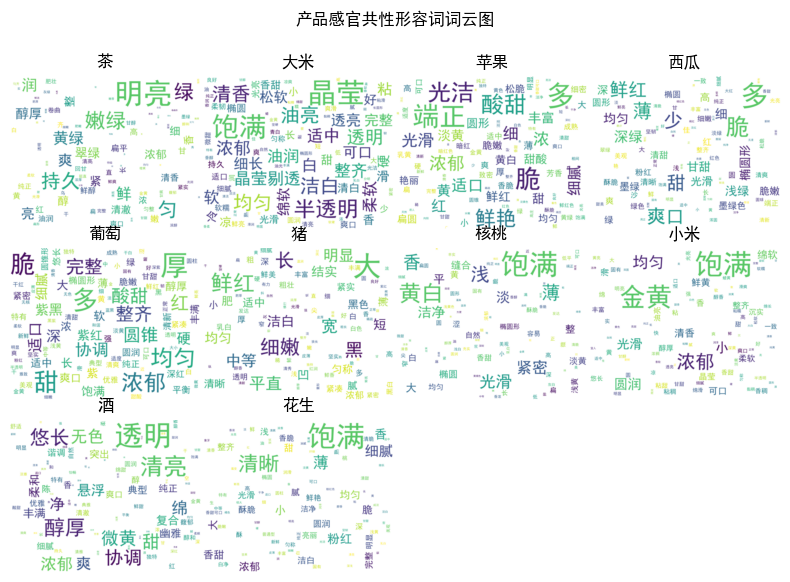

In [2]:
name_list = [
    "茶", "大米","苹果", "西瓜", "葡萄", 
    "猪", "核桃","小米", "酒", "花生", 
]

product_sensory_adj_token_count_dict = {
    name: counter_most_common_list_to_dict(product_sensory_adj_token_count(products, name), scale="square")
    for name in name_list
}

freq_dict_wordcloud(
    product_sensory_adj_token_count_dict,
    sup_title='产品感官共性形容词词云图',
    save_path=os.path.join(figures_save_dir, '产品感官共性形容词词云图.png'),
)

## 地缘差异分析

北方产品的特点与南方产品的特点有何差异？哪些形容词在北方产品中更常用？哪些形容词在南方产品中更常用？

In [3]:
province_sensory_adj_tokens_dict = {
    province: province_sensory_adj_tokens(products, province) 
    for province in province_list(products)
}

In [4]:
# 北方省份
north_provinces = [
    "北京市", "天津市", "河北省", "山西省", "陕西省", "河南省", "黑龙江省", "吉林省", "辽宁省", "内蒙古自治区", "甘肃省", "青海省", "宁夏回族自治区", "新疆维吾尔自治区"
]

# 南方省份
south_provinces = [
    "四川省", "云南省", "贵州省", "湖北省", "湖南省", "江西省", "浙江省", "福建省", "广东省", "广西壮族自治区", "海南省", "江苏省", "安徽省", "上海市"
]

# 北方城市数量前100个形容词
north_province_sensory_adj_tokens = [
    token
    for token, count in Counter([ 
        _token
        for province in north_provinces
        for _token in province_sensory_adj_tokens_dict[province]
    ]).most_common(100) 
]

# 南方城市数量前100个形容词
south_province_sensory_adj_tokens = [
    token
    for token, count in Counter([ 
        _token
        for province in south_provinces
        for _token in province_sensory_adj_tokens_dict[province]
    ]).most_common(100) 
]


# 计算两个列表单独的部分
single_north_province_sensory_adj_tokens = [
    token
    for token in north_province_sensory_adj_tokens
    if token not in south_province_sensory_adj_tokens
]

single_south_province_sensory_adj_tokens = [
    token
    for token in south_province_sensory_adj_tokens
    if token not in north_province_sensory_adj_tokens
]

print(f"北方城市独属的形容词：{single_north_province_sensory_adj_tokens}")
print(f"南方城市独属的形容词：{single_south_province_sensory_adj_tokens}")

北方城市独属的形容词：['深红', '鲜艳', '厚实', '绵软', '纵', '光洁', '悠长', '椭圆', '清新', '圆润', '椭圆形', '强', '丰富', '黄白', '致密', '丰满', '自然', '洁净', '紫红', '酥脆', '微黄', '芳香', '绵', '圆形']
南方城市独属的形容词：['明亮', '匀', '持久', '嫩绿', '润', '亮', '嫩', '黄绿', '清甜', '整', '翠绿', '醇', '清澈', '紧', '细长', '青', '白色', '油润', '扁平', '橙黄', '灰', '粗', '紧凑', '中等']


## 颜色图谱

从地缘差异分析中，我们可以发现不同省份的产品在颜色上存在差异。

因此下面考察每个省份最热门的颜色，绘制颜色图谱。

In [5]:
province_sensory_adj_tokens_dict = {
    province: Counter(province_sensory_adj_tokens(products, province)).most_common()
    for province in province_list(products)
}

In [8]:
color_province_sensory_adj_tokens_dict = {}
color_list = ["红", "橙", "黄", "绿", "青", "蓝", "紫"]

for province, sensory_adj_tokens in province_sensory_adj_tokens_dict.items():
    color_count = []
    for token, count in sensory_adj_tokens:
        for color in color_list:
            if color in token:
                color_count.append((token, count))
                break
    if color_count:
        color_count.sort(key=lambda x: x[1], reverse=True) # 排序
        color_province_sensory_adj_tokens_dict[province] = color_count[0][0]

color_province_sensory_adj_tokens_dict

{'江西省': '嫩绿',
 '浙江省': '绿',
 '广东省': '黄',
 '陕西省': '黄',
 '青海省': '深红',
 '西藏自治区': '鲜红',
 '上海市': '紫红',
 '湖南省': '黄',
 '安徽省': '绿',
 '重庆市': '橙色',
 '四川省': '黄',
 '内蒙古自治区': '鲜红',
 '海南省': '鲜红',
 '山西省': '金黄',
 '甘肃省': '鲜红',
 '河北省': '鲜红',
 '北京市': '乳黄',
 '贵州省': '绿',
 '天津市': '紫',
 '吉林省': '黄',
 '河南省': '红',
 '山东省': '黄',
 '黑龙江省': '金黄',
 '宁夏回族自治区': '金黄',
 '江苏省': '黄',
 '湖北省': '嫩绿',
 '福建省': '红',
 '新疆维吾尔自治区': '深红',
 '辽宁省': '金黄',
 '广西壮族自治区': '鲜红',
 '云南省': '黄白'}

d:\Project\Chinese-Nationnal-Geographic-Products\.conda\lib\site-packages\geopandas\io\file.py:576: UserWarning: Could not parse column 'adcode' as JSON; leaving as string
  return pyogrio.read_dataframe(path_or_bytes, bbox=bbox, **kwargs)


已生成：figures\颜色图谱.png


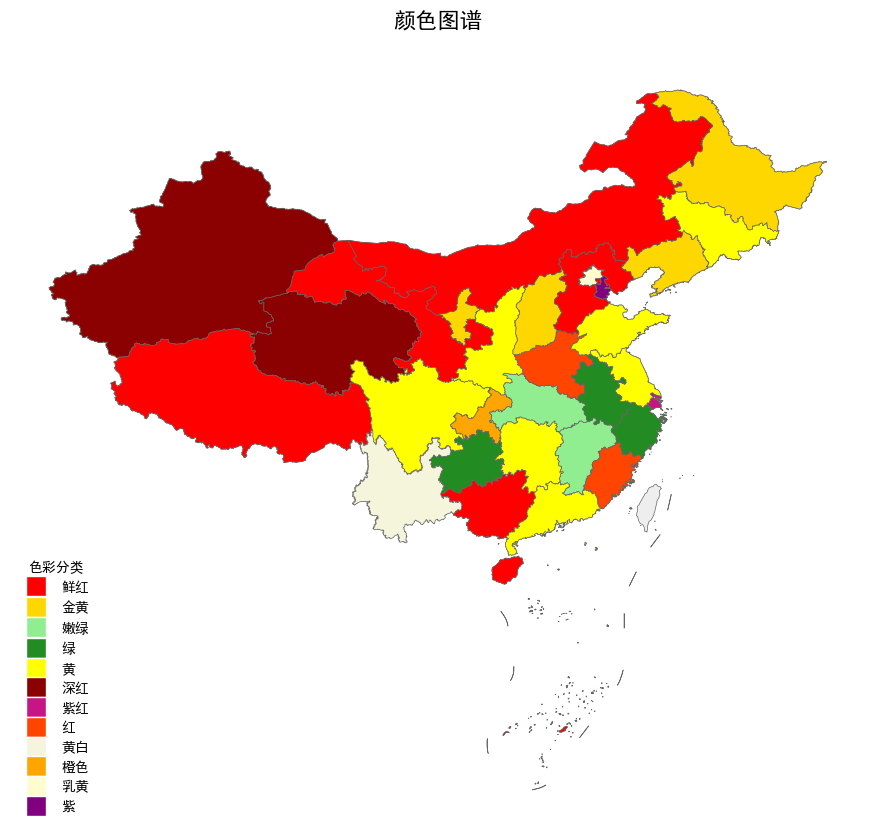

In [9]:
# 颜色映射表 (Hex)
hex_map = {
    '鲜红': '#FF0000', '金黄': '#FFD700', '嫩绿': '#90EE90', '绿': '#228B22',
    '黄': '#FFFF00', '深红': '#8B0000', '紫红': '#C71585', '红': '#FF4500',
    '黄白': '#F5F5DC', '橙色': '#FFA500', '乳黄': '#FFFDD0', '紫': '#800080'
}

color_map(
    color_province_sensory_adj_tokens_dict, 
    hex_map,
    os.path.join(figures_save_dir, '颜色图谱.png')     
)


## 省份感官特征雷达图

对比不同省份的感官特征维度（颜色、气味、口感、质地、形态），使用雷达图展示。

通过雷达图可以直观地看出不同省份在各个感官维度上的侧重。

In [ ]:
# 统计各省份各感官维度的形容词数量
province_dimension_count = count_province_sensory_dimensions(products)

# 归一化处理
normalized_data = normalize_dimension_counts(province_dimension_count)

# 选择产品数量最多的6个省份
selected_provinces = select_top_provinces(province_dimension_count, top_n=6)

print("选择的省份及产品数量：")
for province, count in selected_provinces:
    print(f"  {province}: {count}个形容词")

print("\n各省份各感官维度的原始数量：")
for province, _ in selected_provinces:
    print(f"\n{province}:")
    for dim, count in province_dimension_count[province].items():
        print(f"  {dim}: {count}")
        

In [ ]:
# 绘制雷达图
plot_sensory_radar_chart(
    normalized_data,
    selected_provinces,
    os.path.join(figures_save_dir, '省份感官特征雷达图.png')
)


## 产品类别分布分析

统计不同产品类型（茶、水果、肉类、谷物等）的数量和占比，使用饼图和环形图展示。

通过饼图可以直观地看出各类别产品的分布情况。

In [ ]:
# 统计各类别产品数量
category_count = count_product_categories(products)

# 计算占比
category_percentage = calculate_category_percentage(category_count)

# 按数量降序排列
sorted_categories = sorted(category_count.items(), key=lambda x: x[1], reverse=True)

print("各类别产品数量及占比：")
for category, count in sorted_categories:
    percentage = category_percentage[category]
    print(f"  {category}: {count}个 ({percentage:.1f}%)")

In [ ]:
# 绘制饼图
plot_product_category_pie_chart(
    category_count,
    os.path.join(figures_save_dir, '产品类别分布饼图.png'),
    chart_type="pie"
)

In [ ]:
# 绘制环形图
plot_product_category_pie_chart(
    category_count,
    os.path.join(figures_save_dir, '产品类别分布环形图.png'),
    chart_type="donut"
)